In [1]:
## Importing libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries for data processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# library for BART
from ISLP.bart import BART
from scipy.stats import norm

In [3]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [4]:
## Import the dataframe

In [5]:
# Display the path of the file
import os
for dirname, _, filenames in os.walk('C:/Users/kellykim/Desktop/BART'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/kellykim/Desktop/BART\BART_HeartDiseasePrediction.ipynb
C:/Users/kellykim/Desktop/BART\BART_insurance_data.ipynb
C:/Users/kellykim/Desktop/BART\Carseats data EDA.ipynb
C:/Users/kellykim/Desktop/BART\Ch08_baggboost_lab_ipynb의_사본.ipynb
C:/Users/kellykim/Desktop/BART\heart.csv
C:/Users/kellykim/Desktop/BART\insurance_classification.csv
C:/Users/kellykim/Desktop/BART\.ipynb_checkpoints\BART_HeartDiseasePrediction-checkpoint.ipynb
C:/Users/kellykim/Desktop/BART\.ipynb_checkpoints\BART_insurance_data-checkpoint.ipynb
C:/Users/kellykim/Desktop/BART\.ipynb_checkpoints\Carseats data EDA-checkpoint.ipynb
C:/Users/kellykim/Desktop/BART\.ipynb_checkpoints\Ch08_baggboost_lab_ipynb의_사본-checkpoint.ipynb


In [149]:
data = pd.read_csv('C:/Users/kellykim/Desktop/BART\heart.csv')

# Exploratory Data Analysis (EDA)

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
data.shape

(1025, 14)

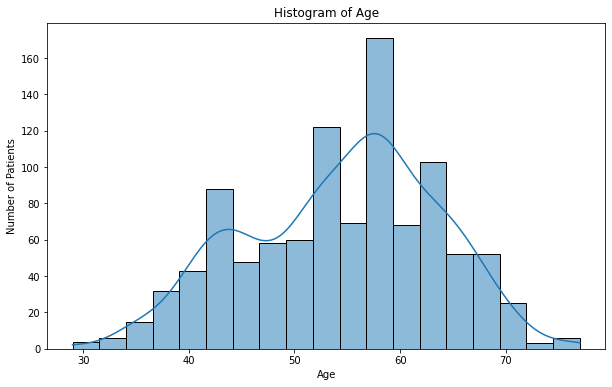

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data['age'], kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

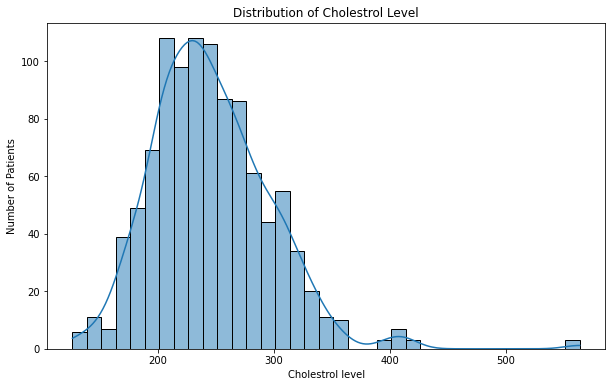

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data['chol'], kde=True)
plt.title('Distribution of Cholestrol Level')
plt.xlabel('Cholestrol level')
plt.ylabel('Number of Patients')
plt.show()

In [15]:
# heatmap of correlation matrix

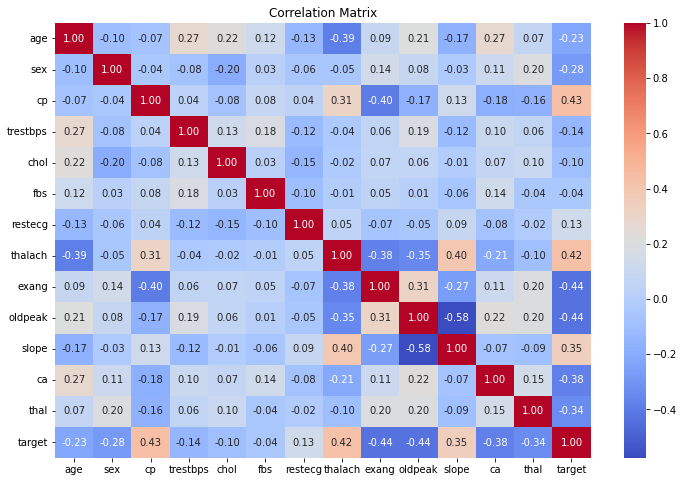

In [17]:
# Set the figure size
plt.figure(figsize=(12,8))

# Create a heatmap using Seaborn
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Matrix')

#Show the plot
plt.show()

In [ ]:
# Creating boxplots to visualize the distribution and identify outliers for the variables age, chol, thalach, and trestbps

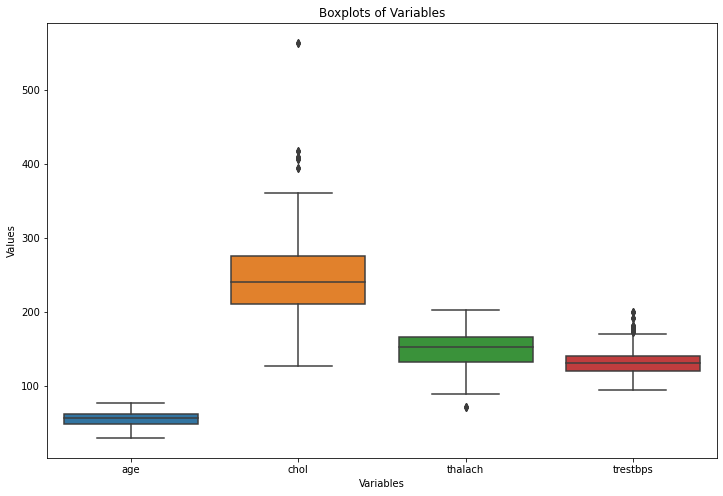

In [19]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create boxplots using Seaborn
sns.boxplot(data=data[['age', 'chol', 'thalach', 'trestbps']])

# Add title and labels
plt.title('Boxplots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

In [18]:
# Data Preparation

In [20]:
for col in data.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), data[col].mean(), data[col])

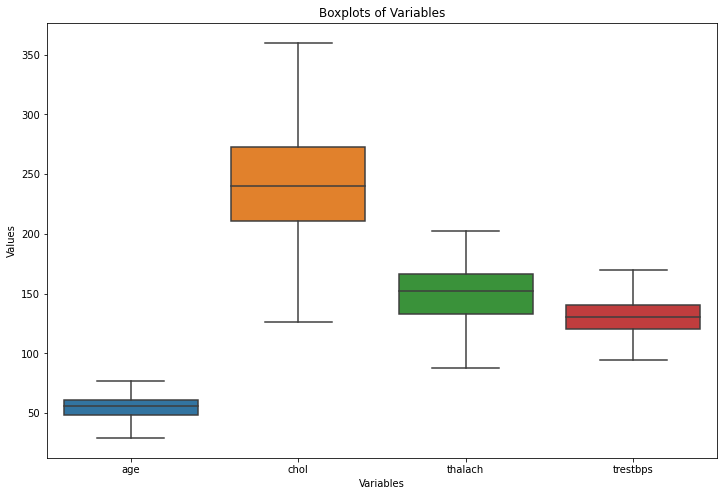

In [21]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create boxplots using Seaborn
sns.boxplot(data=data[['age', 'chol', 'thalach', 'trestbps']])

# Add title and labels
plt.title('Boxplots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

In [22]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [23]:
## From the statistics describtion of the data (data.discribe()), we can see the numerical columns must be scaled and the categorical columns must be encoded

In [24]:
### Normalizing numeric variables with StandardScaler
df_processed = data.copy()

scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

In [216]:
### Encoding categorical variables with LabelEncoder
label_encoder = LabelEncoder()
df_processed[categorical_cols] = df_processed[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

In [177]:
df_processed[categorical_cols] = scaler.fit_transform(df_processed[categorical_cols])

In [217]:
df_processed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.340303,-0.689427,0,1,0.826974,0,-0.035136,2,3,3,0.0
1,-0.158157,1,0,0.653393,-0.889388,1,0,0.248391,1,1.865082,0,0,3,0.0
2,1.716595,1,0,0.984624,-1.533707,0,1,-1.086800,1,1.412649,0,0,3,0.0
3,0.724079,1,0,1.183364,-0.889388,0,1,0.515429,0,-0.940001,2,2,3,0.0
4,0.834359,0,0,0.520900,1.132441,1,1,-1.932422,0,0.779243,1,1,1,0.0


# Modelling

## Supervised Learning

In [179]:
features = df_processed.drop('target', axis=1)
target = df_processed['target']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [187]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape
print(f'The shape of training features is: {X_train.shape}')
print(f'The shape of training target is: {y_train.shape}')

print(f'The shape of testing features is: {X_test.shape}')
print(f'The shape of testing target is: {y_test.shape}')

The shape of training features is: (820, 13)
The shape of training target is: (820,)
The shape of testing features is: (205, 13)
The shape of testing target is: (205,)


### KNN(K-Nearest Neigbors classifier)

In [188]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiation of the 5-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Training the classifier on the training data
knn.fit(X_train, y_train)

# Prediction on the test data
y_pred = knn.predict(X_test)

In [189]:
# Calculating various performance metrics for a classification model using couple of metrics

In [190]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculation of accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculation of precision
precision = precision_score(y_test, y_pred)

# Calculation of recall
recall = recall_score(y_test, y_pred)

# Calculation of F1 score
f1 = f1_score(y_test, y_pred)

# Displaying the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Accuracy: 84.39%
Precision: 80.34%
Recall: 91.26%
F1 Score: 85.45%


In [191]:
results = []

# Testing different values of k from 1 to 10
for k in range(1, 11):
    # Instantiation of the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Training the classifier on the training data
    knn.fit(X_train, y_train)

    # Prediction on the test data
    y_pred = knn.predict(X_test)

    # Calculation of accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adding results to the list
    results.append((k, accuracy))

# Creating a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['k', 'Accuracy'])

# Displaying the results table
print(results_df)

    k  Accuracy
0   1  0.985366
1   2  0.975610
2   3  0.926829
3   4  0.878049
4   5  0.843902
5   6  0.824390
6   7  0.814634
7   8  0.824390
8   9  0.834146
9  10  0.843902


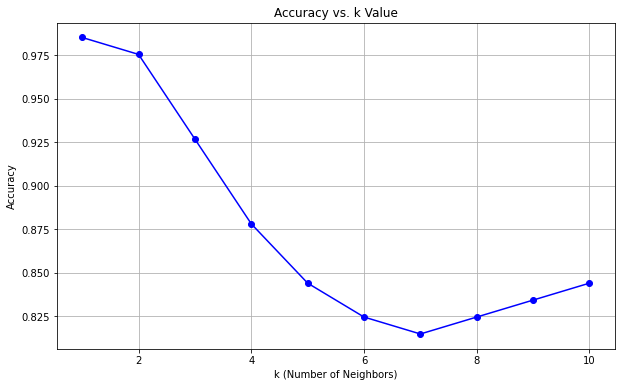

In [192]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['Accuracy'], marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [44]:
#### The best value of k is  1

### BART(Bayesian Additive Regression Tree)

In [241]:
bart = BART(num_trees=50, burnin=100)
bart.fit(X_train, y_train)

BART(num_trees=50)

In [242]:
y_pred_bart = bart.predict(X_test.to_numpy())

In [243]:
y_pred_bart_binary = [1 if norm.cdf(pred) >= 0.5 else 0 for pred in y_pred_bart]

In [244]:
# Calculation of accuracy
accuracy = accuracy_score(y_test, y_pred_bart_binary)

# Calculation of precision
precision = precision_score(y_test, y_pred_bart_binary)

# Calculation of recall
recall = recall_score(y_test, y_pred_bart_binary)

# Calculation of F1 score
f1 = f1_score(y_test, y_pred_bart_binary)

# Displaying the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Accuracy: 60.98%
Precision: 56.35%
Recall: 99.03%
F1 Score: 71.83%


In [ ]:
results = []

# Testing different values of k from 1 to 10
for k in [50, 100, 150]:
    # Instantiation of the k-NN classifier
    bart = BART(num_trees=k, burnin=100)

    # Training the classifier on the training data
    bart.fit(X_train, y_train)

    # Prediction on the test data
    y_pred = bart.predict(X_test.to_numpy())
    y_pred_binary = [1 if norm.cdf(pred) >= 0.5 else 0 for pred in y_pred]

    # Calculation of accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)

    # Adding results to the list
    results.append((k, accuracy))

# Creating a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['k', 'Accuracy'])

# Displaying the results table
print(results_df)

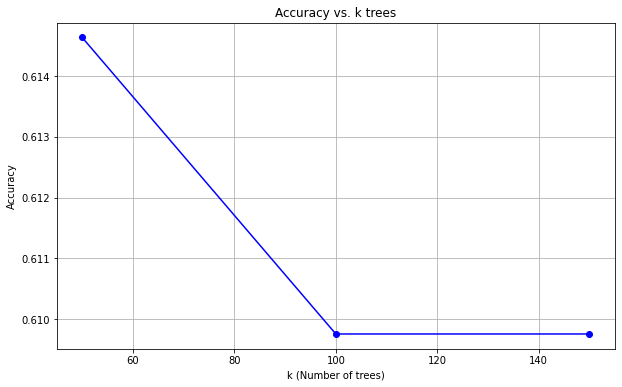

In [225]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['Accuracy'], marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k trees')
plt.xlabel('k (Number of trees)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()